Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

# importing libaries

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [27]:
data=pd.read_csv("EastWestAirline.csv")


In [28]:
data

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


# EDA 

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [30]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [31]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [32]:
data=data.drop(['ID#','Award?'],axis=1)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


# normalization 

In [33]:
from sklearn.preprocessing import MinMaxScaler
transformation=MinMaxScaler()
data_new=pd.DataFrame(transformation.fit_transform(data.iloc[:,0:]))

In [34]:
data_new

,0,1,2,3,4,5,6,7,8,9
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905
...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676


# creating dendrogram

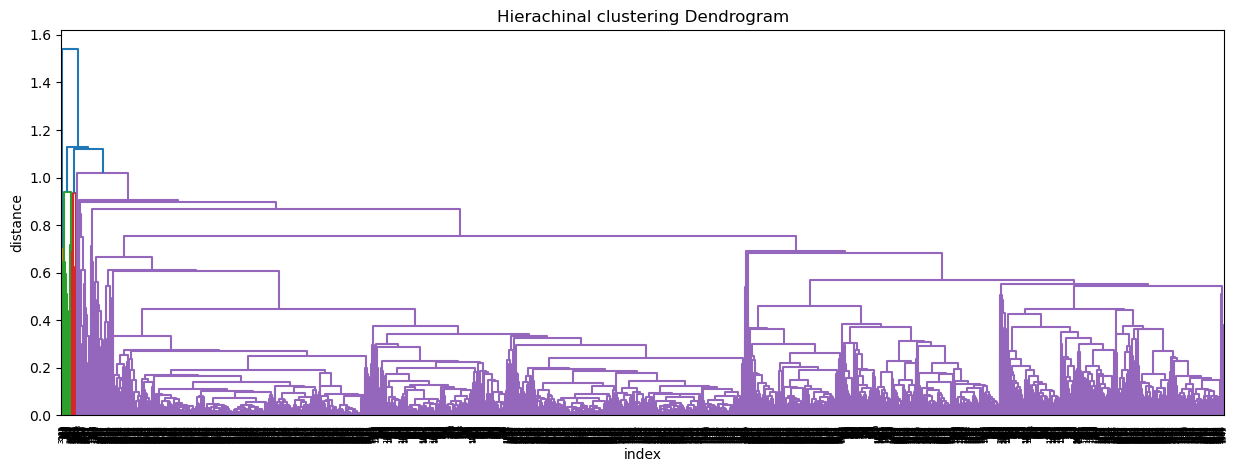

In [40]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
z=linkage(data_new,method='average',metric='euclidean')
plt.figure(figsize=(15,5))
plt.title("Hierachinal clustering Dendrogram")
plt.xlabel("index")
plt.ylabel("distance")
sch.dendrogram(z)
plt.show()

# cutting the dendrogram into clusters


In [41]:
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')
H_complete=AgglomerativeClustering(n_clusters=4, linkage="average",affinity="euclidean").fit(data_new)
cluster_labels=pd.Series(H_complete.labels_)
cluster_labels
data['clust']=cluster_labels
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


# group by

In [42]:
data.iloc[:,1:].groupby(data.clust).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
clust,,,,,,,,,,
0,141.044844,2.030656,1.014695,1.000760,16030.624778,11.270585,408.284773,1.220674,4099.240942,0.0
1,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,1.0
2,512.228571,4.771429,1.000000,1.000000,108066.600000,38.457143,5056.371429,15.571429,6216.057143,2.0
3,250.000000,1.000000,1.000000,1.000000,49057.500000,72.000000,21845.000000,53.000000,1822.500000,3.0


In [43]:
data0=data[(data.clust==0)]
data0

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [44]:
data1=data[(data.clust==1)]
data1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
106,96627,1182,1,1,3,49059,26,2300,9,6738,1
384,28193,0,5,1,4,103456,32,0,0,6980,1
850,25629,0,4,1,5,107308,36,600,2,5966,1
904,15835,0,2,1,5,112171,16,0,0,5825,1
1036,154664,0,4,1,3,73881,33,0,0,5769,1
1244,166465,0,4,1,4,98717,30,0,0,5531,1
1300,737514,0,3,1,4,43993,40,2150,7,5030,1
1878,128302,0,5,1,4,132263,32,400,2,4103,1
1917,82981,0,5,1,3,105325,44,1000,2,3964,1
1946,126873,0,4,1,5,95598,32,500,1,3880,1


In [46]:
data3=data[(data.clust==3)]
data3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
3235,287033,0,1,1,1,26161,58,12873,53,2272,3
3583,160114,500,1,1,1,71954,86,30817,53,1373,3


In [47]:
import sklearn
sklearn.metrics.silhouette_score(data_new,H_complete.labels_)

0.4165901916058432

# applying KMean clustering


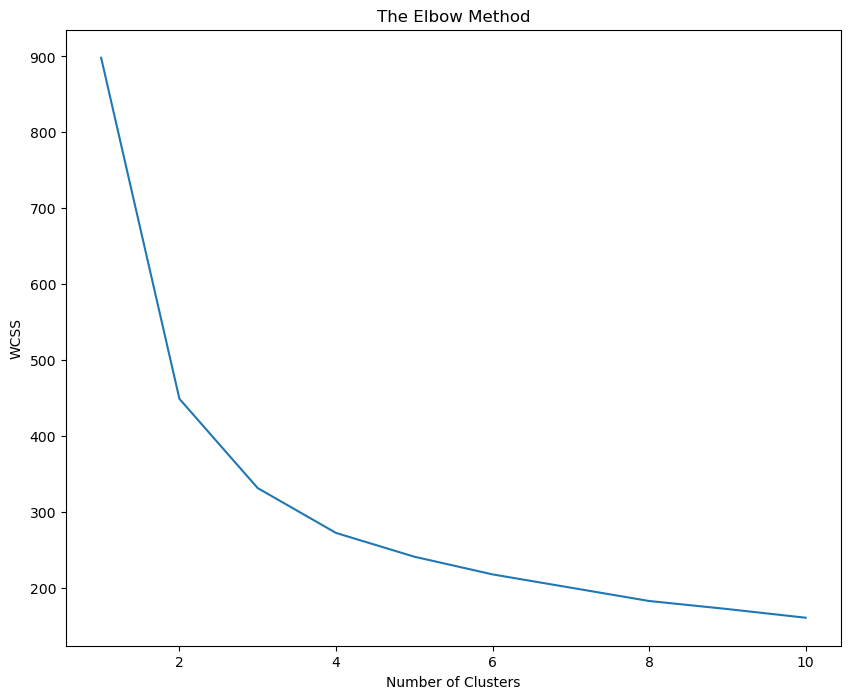

In [48]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i)
    clf.fit(data_new)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show() 

In [49]:
clf = KMeans(n_clusters=4)
y_kmeans = clf.fit_predict(data_new)  

In [50]:
y_kmeans
#clf.cluster_centers_
clf.labels_ 

array([2, 2, 2, ..., 3, 1, 1])

In [51]:
y_kmeans 


array([2, 2, 2, ..., 3, 1, 1])

In [52]:
clf.cluster_centers_ 

array([[8.05148873e-02, 1.47645960e-02, 7.54016064e-01, 6.69344043e-04,
        8.70147256e-03, 1.78146423e-01, 2.29024626e-01, 1.93540058e-02,
        3.36692683e-02, 7.44146427e-01],
       [2.36724363e-02, 1.09788344e-02, 2.37926136e-02, 1.10085227e-02,
        1.24289773e-03, 1.69214392e-02, 8.35177722e-02, 1.28437586e-02,
        2.19500429e-02, 2.65314415e-01],
       [3.87082781e-02, 1.52707004e-02, 3.21888412e-02, 1.07296137e-02,
        1.50214592e-03, 1.96348371e-02, 9.29234455e-02, 1.58009047e-02,
        2.81156369e-02, 6.93991623e-01],
       [5.01832357e-02, 1.09262286e-02, 6.25920471e-01, 7.36377025e-04,
        3.31369661e-03, 1.18174302e-01, 2.09953077e-01, 1.28867533e-02,
        2.18412204e-02, 3.63597299e-01]])

In [53]:
clf.inertia_

272.39262630647465

In [54]:
md=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
data['clust']=md # creating a  new column and assigning it to new column 
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
0,28143,0,1,1,1,174,1,0,0,7000,2
1,19244,0,1,1,1,215,2,0,0,6968,2
2,41354,0,1,1,1,4123,4,0,0,7034,2
3,14776,0,1,1,1,500,1,0,0,6952,2
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,3
3997,54899,0,1,1,1,500,1,500,1,1401,1


In [55]:
data.iloc[:,1:].groupby(data.clust).mean()


,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust
clust,,,,,,,,,,
0,164.595716,4.016064,1.001339,1.034806,46974.539491,19.696118,596.432396,1.784471,6173.950469,0.0
1,122.392045,1.095170,1.022017,1.004972,4461.929688,7.182528,395.806108,1.163352,2202.517756,1.0
2,170.237768,1.128755,1.021459,1.006009,5177.412017,7.991416,486.936481,1.490129,5757.966524,2.0
3,121.805596,3.503682,1.001473,1.013255,31160.790869,18.055965,397.131075,1.157585,3017.675994,3.0


In [56]:
# to know the styles 
plt.style.use(['classic']) 
print(plt.style.available) 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Clusters using KMeans')

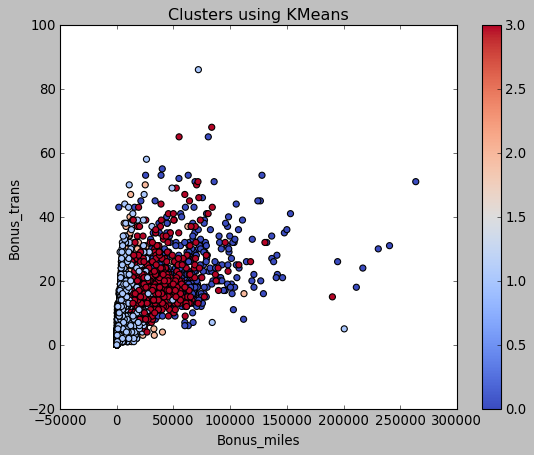

In [58]:
data.plot(x="Bonus_miles",y ="Bonus_trans",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans')  

In [59]:
WCSS

[898.2705822007467,
 448.9989194445697,
 331.4315185424921,
 272.39254909046446,
 241.077202343926,
 217.7662407090352,
 200.2481795502983,
 182.71967252230723,
 172.1168446689668,
 160.69217918893585]

In [60]:
import sklearn
sklearn.metrics.silhouette_score(data_new,y_kmeans)

0.37660565218548464

# DBSCAN


In [61]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [62]:
neighbors=NearestNeighbors(n_neighbors=8)
nbrs=neighbors.fit(data_new)
distances, indices=nbrs.kneighbors(data_new)

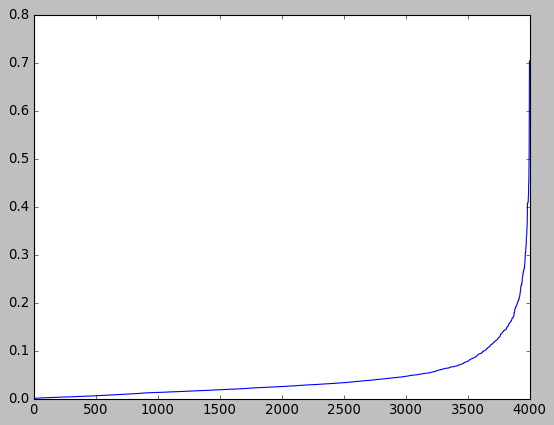

In [63]:
distances=np.sort(distances,axis=0)
distances=distances[:,1]
plt.plot(distances)

In [74]:
dbscan=DBSCAN(eps=0.475, min_samples=5)
dbscan.fit(data_new)

DBSCAN(eps=0.475)

In [65]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
c1=pd.DataFrame(dbscan.labels_,columns=['clusters'])


In [67]:
c1

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,0


In [68]:
df1=pd.concat([data,c1],axis=1)

In [69]:
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,clust,clusters
0,28143,0,1,1,1,174,1,0,0,7000,2,0
1,19244,0,1,1,1,215,2,0,0,6968,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,2,0
3,14776,0,1,1,1,500,1,0,0,6952,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,3,0
3997,54899,0,1,1,1,500,1,500,1,1401,1,0


<AxesSubplot:xlabel='Balance', ylabel='Days_since_enroll'>

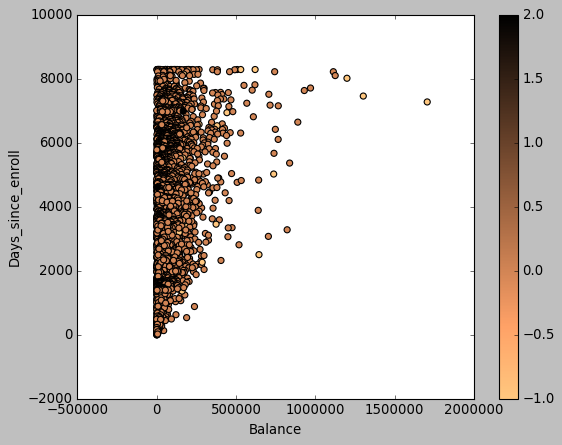

In [71]:
#visualize the clusters
df1.plot(x="Balance",y="Days_since_enroll",c=dbscan.labels_,s=30,kind="scatter",cmap=plt.cm.copper_r)

In [72]:
d1=dbscan.labels_

In [73]:
import sklearn
sklearn.metrics.silhouette_score(data_new,d1)

0.20118281142077335